# AgML Public Data Pipeline

One of the primary goals of AgML is the **synthesizing and standardization of public data sources** in the field of agricultural deep learning. To this end, we have standardized over 40 publicly available data sources across three primary deep learning tasks: *image classification*, *object detection*, and *semantic segmentation* (with more to come in the future).

AgML's public data pipeline is located in the `agml.data` module, which this tutorial will walk through.

In [1]:
!pip install -q agml albumentations


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from pprint import pprint

import numpy as np

import agml
import agml.viz as viz

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Inspecting available sources

All of AgML's publicly available data sources can be inspected and filtered using the `agml.data.public_data_sources` method:





In [3]:
pprint(agml.data.public_data_sources())

[bean_disease_uganda,
 carrot_weeds_germany,
 plant_seedlings_aarhus,
 soybean_weed_uav_brazil,
 sugarcane_damage_usa,
 crop_weeds_greece,
 sugarbeet_weed_segmentation,
 rangeland_weeds_australia,
 fruit_detection_worldwide,
 leaf_counting_denmark,
 apple_detection_usa,
 mango_detection_australia,
 apple_flower_segmentation,
 apple_segmentation_minnesota,
 rice_seedling_segmentation,
 plant_village_classification,
 autonomous_greenhouse_regression,
 grape_detection_syntheticday,
 grape_detection_californiaday,
 grape_detection_californianight,
 guava_disease_pakistan,
 apple_detection_spain,
 apple_detection_drone_brazil,
 plant_doc_classification,
 plant_doc_detection,
 wheat_head_counting,
 peachpear_flower_segmentation,
 red_grapes_and_leaves_segmentation,
 white_grapes_and_leaves_segmentation,
 ghai_romaine_detection,
 ghai_green_cabbage_detection,
 ghai_iceberg_lettuce_detection,
 riseholme_strawberry_classification_2021,
 ghai_broccoli_detection,
 bean_synthetic_earlygrowth_aeria

The list of datasets can then be filtered by a number of potential arguments, ranging from a threshold on the number of images, to the location the dataset was captured in, or the most common one, the deep learning task the dataset is designed for. For instance:

In [4]:
# Filter datasets by their number of images and deep learning task.
pprint(
    agml.data.public_data_sources(ml_task="object_detection", location="country:usa")
)

[apple_detection_usa,
 ghai_broccoli_detection,
 ghai_green_cabbage_detection,
 ghai_iceberg_lettuce_detection,
 ghai_romaine_detection,
 ghai_strawberry_fruit_detection,
 grape_detection_californiaday,
 grape_detection_californianight]


Once you've found the dataset you want, if you just want to download the dataset to your system, you can use the `agml.data.download_public_dataset` method to download it to the desired path. However, to actually work with the dataset, the next step is the `AgMLDataLoader`.

## Introduction to the AgMLDataLoader

The core of AgML's public data pipeline is the `AgMLDataLoader`, which facilitates access to these data sources in an easy-to-use and intuitive way for users of all skill levels and backgrounds.

The `AgMLDataLoader` is designed with the deep learning task of the dataset chosen in mind. The exact API of the loader will vary with the dataset that you've chosen (e.g., at the moment there are three distinct APIs for the three different supported tasks), although the methods and arguments mostly remain consistent. See the [documentation insert link here]() for more information. We'll start with an image classification dataset to demonstrate the general capabilities of the loader.

### Basic features and API usage

Instantiation of the `AgMLDataLoader` is as simple as just giving the name of the dataset you want to use. The loader will automatically search for the dataset in the default local path on your system, `~/.agml/datasets` (or a custom path provided in `dataset_path`), or download it to be loaded from disk on simultaneous runs.

For this walkthrough, we'll use the `bean_disease_uganda` dataset.

In [5]:
loader = agml.data.AgMLDataLoader("bean_disease_uganda")
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: bean_disease_uganda
Machine Learning Task: image_classification
Agricultural Task: disease_classification
Location:
  continent: africa
  country: uganda
Sensor Modality: rgb
Real Or Synthetic: real
Platform: handheld
Input Data Format: jpg
Annotation Format: directory_names
Number of Images: 1295
Documentation: https://github.com/AI-Lab-Makerere/ibean/
Stats:
  mean:
  - 0.48483240604400635
  - 0.5186856389045715
  - 0.3107088804244995
  std:
  - 0.18201091885566711
  - 0.19948190450668335
  - 0.16856084764003754
Classes:
  '0': angular_leaf_spot
  '1': bean_rust
  '2': healthy
External Image Sources: []


*Note*: You can save the dataset to a custom path, so for example, in Google Colab, to your Google Drive, using the `dataset_path` argument as mentioned above:

In [6]:
# Mount Google Drive into Colab
import sys

if "google.colab" in sys.modules:
    from google.colab import drive

    drive.mount("/content/drive")

    # Load the dataset into Google Drive
    loader = agml.data.AgMLDataLoader(
        "bean_disease_uganda", dataset_path="/content/drive/MyDrive/AgMLData/"
    )

If you want to save future datasets into Google Drive, simply add the `dataset_path` argument as shown above to the `loader` instantiation.

We can access information about the dataset through its `info` parameter, such as the number of images, the image/annotation formats, or the location of the dataset. A summary of this info can be printed using `info.summary()`:

In [7]:
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: bean_disease_uganda
Machine Learning Task: image_classification
Agricultural Task: disease_classification
Location:
  continent: africa
  country: uganda
Sensor Modality: rgb
Real Or Synthetic: real
Platform: handheld
Input Data Format: jpg
Annotation Format: directory_names
Number of Images: 1295
Documentation: https://github.com/AI-Lab-Makerere/ibean/
Stats:
  mean:
  - 0.48483240604400635
  - 0.5186856389045715
  - 0.3107088804244995
  std:
  - 0.18201091885566711
  - 0.19948190450668335
  - 0.16856084764003754
Classes:
  '0': angular_leaf_spot
  '1': bean_rust
  '2': healthy
External Image Sources: []


For general purposes, the dataloader can be treated as an iterable object. We can extract the first image and its label as follows:

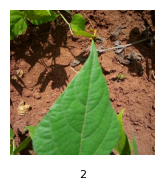

In [8]:
image, label = loader[0]
_ = viz.show_images_and_labels(image, label)

The `AgMLDataLoader` interface exposes a number of methods to integrate into existing pipelines. For instance, if you want to batch the data in the loader, then simply use `loader.batch()`:

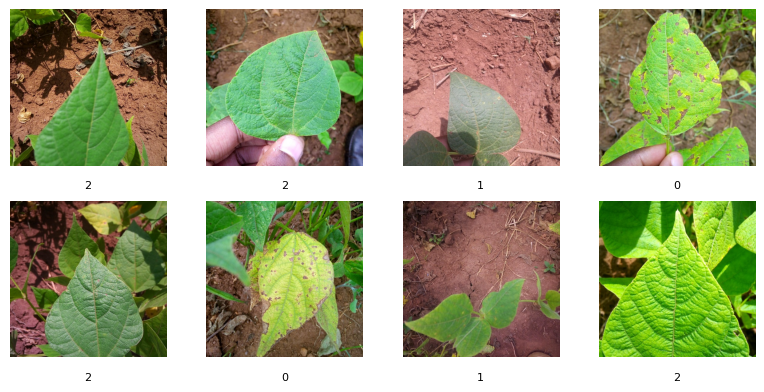

In [9]:
loader.batch(8)
_ = viz.show_images_and_labels(loader[0])

Next, suppose we want to split the data into train, validation, and test pipelines (or some combination of the above). We can use `loader.split()`, specifying the split that we want, and then access the reduced data through `loader.train_data`, `loader.val_data`, and `loader.test_data`. For example:

In [10]:
# Un-batch the data for splitting.
loader.batch(None)

loader.split(train=0.7, val=0.2, test=0.1)
train, val, test = loader.train_data, loader.val_data, loader.test_data
print(
    f"Total Length:\t {len(loader)}\n"
    f"Train Length:\t {len(train)}\n"
    f"Val Length:\t {len(val)}\n"
    f"Test Length:\t {len(test)}"
)

Total Length:	 1295
Train Length:	 907
Val Length:	 259
Test Length:	 129


We can also shuffle the data to get a new random order of elements.

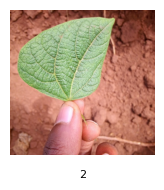

In [11]:
loader.shuffle()
_ = viz.show_images_and_labels(loader[0])

The above API features are consistent across all of the different datasets. For instance, let's try instantiating a semantic segmentation dataset:

In [12]:
loader = agml.data.AgMLDataLoader("apple_flower_segmentation")
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: apple_flower_segmentation
Machine Learning Task: semantic_segmentation
Agricultural Task: flower_segmentation
Location:
  continent: north_america
  country: usa
Sensor Modality: rgb
Real Or Synthetic: real
Platform: ground
Input Data Format: jpg
Annotation Format: image
Number of Images: 148
Documentation: https://data.nal.usda.gov/dataset/data-multi-species-fruit-flower-detection-using-refined-semantic-segmentation-network
Stats:
  mean:
  - 0.4580204486846924
  - 0.47888585925102234
  - 0.4053090512752533
  std:
  - 0.2040298879146576
  - 0.19258278608322144
  - 0.2156316637992859
Classes:
  '0': apple
External Image Sources: []


The `AgMLDataLoader` can be used as an iterable here as well:

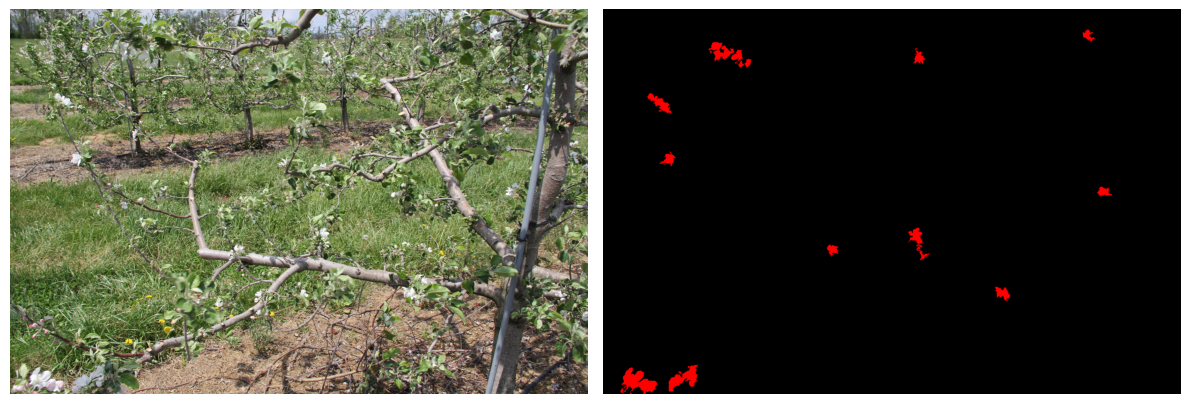

In [13]:
image, annotation = loader[0]
_ = viz.show_image_and_mask(image, annotation)

And we can batch, split, and shuffle the data. For instance:

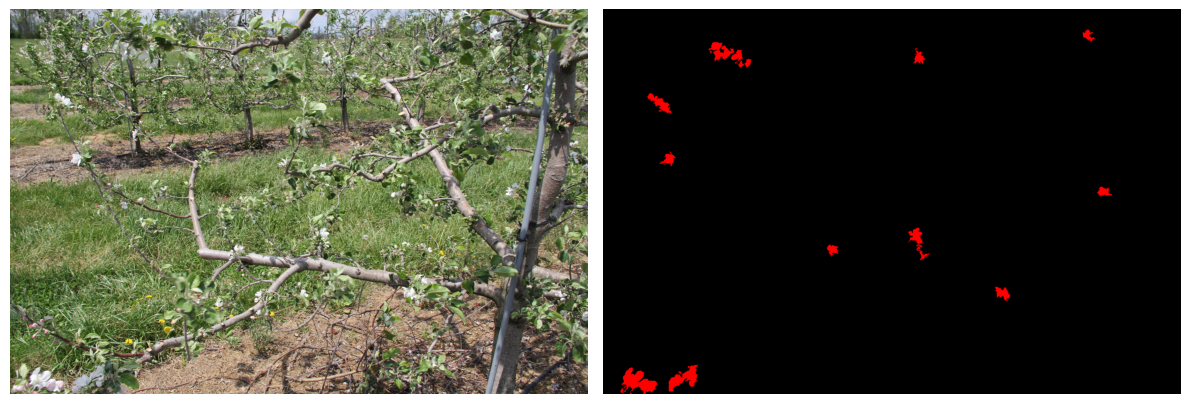

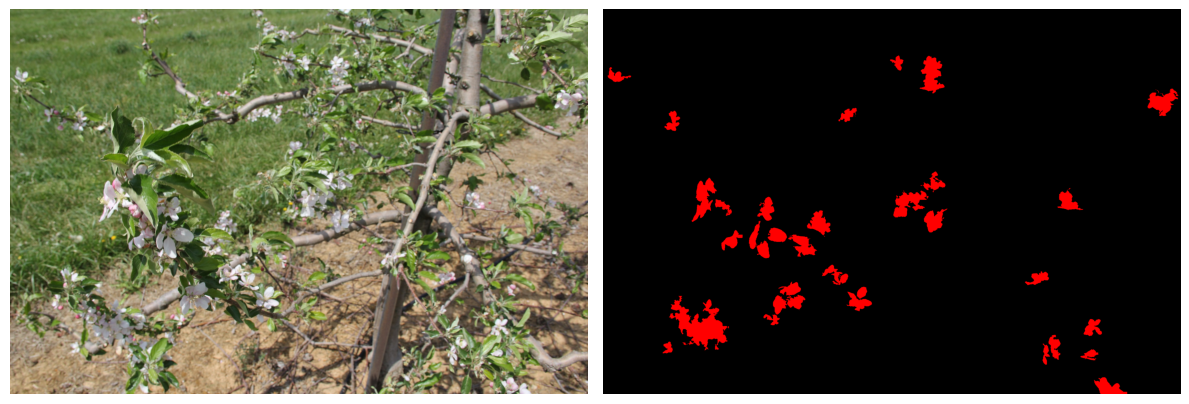

In [14]:
loader.batch(8)
images, annotations = loader[0]
for image, annotation in zip(images[:2], annotations[:2]):
    image, annotation = np.squeeze(image), np.squeeze(annotation)
    _ = viz.show_image_and_mask(image, annotation)

### Differences with object detection datasets

Datasets for object detection function a bit differently. Namely, rather than mapping images with labels or annotation masks, images are mapped with a COCO JSON annotation dictionary, with the expectation that they will be then used in an anchor generation pipeline or something else.

Let's check out an object detection dataset.

In [15]:
loader = agml.data.AgMLDataLoader("fruit_detection_worldwide")
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: fruit_detection_worldwide
Machine Learning Task: object_detection
Agricultural Task: fruit_detection
Location:
  continent: worldwide
  country: worldwide
Sensor Modality: rgb
Real Or Synthetic: real
Platform: mixed
Input Data Format: jpg
Annotation Format: coco_json
Number of Images: 565
Documentation: https://drive.google.com/drive/folders/1CmsZb1caggLRN7ANfika8WuPiywo4mBb
Stats:
  mean:
  - 0.3779049813747406
  - 0.4085286557674408
  - 0.28682708740234375
  std:
  - 0.2306382656097412
  - 0.22500208020210266
  - 0.2183498740196228
Classes:
  '1': avocado
  '2': rockmelon
  '3': apple
  '4': orange
  '5': strawberry
  '6': mango
  '7': capsicum
External Image Sources: []


We can extract the first element of the dataset by using it as an iterable:

{'area': array([9471, 1480, 3645, 7881, 6916, 6188, 6322, 4128, 1950, 2754, 1722,
       2337, 2970, 1218, 2728, 2176, 1519, 2478, 1209, 1564, 1599, 1334,
        784, 1080, 1240,  736,  884]),
 'bbox': array([[454, 239,  77, 123],
       [546, 217,  37,  40],
       [444, 185,  45,  81],
       [382, 235,  71, 111],
       [396, 320,  76,  91],
       [341, 286,  68,  91],
       [304, 301,  58, 109],
       [271, 290,  43,  96],
       [357, 194,  39,  50],
       [291, 223,  54,  51],
       [253, 154,  42,  41],
       [250, 278,  41,  57],
       [211, 293,  54,  55],
       [212,  78,  29,  42],
       [136, 140,  44,  62],
       [132, 214,  32,  68],
       [143, 238,  31,  49],
       [105, 266,  42,  59],
       [105, 226,  31,  39],
       [ 80, 232,  34,  46],
       [ 53, 203,  41,  39],
       [ 52, 240,  29,  46],
       [ 29, 246,  28,  28],
       [ 37, 163,  30,  36],
       [ 35, 199,  31,  40],
       [ 17, 168,  23,  32],
       [215, 196,  26,  34]]),
 'category_i

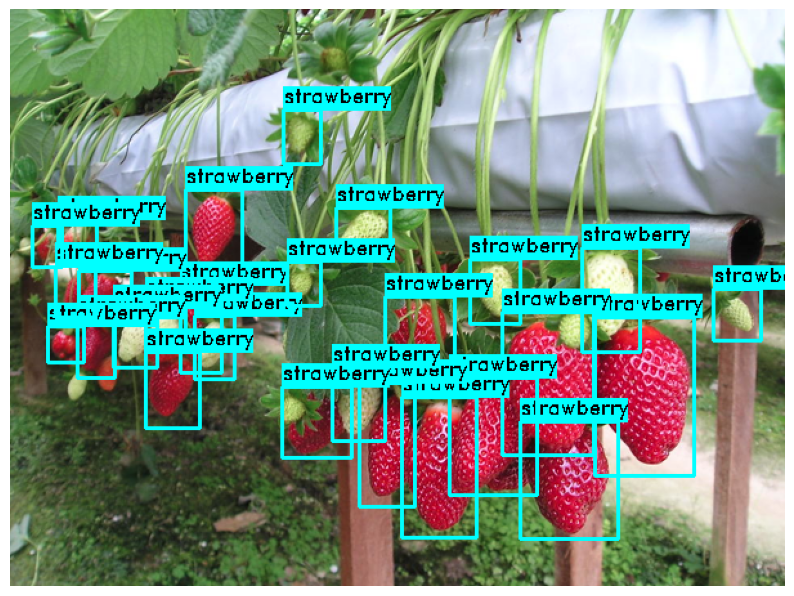

In [16]:
image, coco_info = loader[0]
pprint(coco_info)
_ = viz.show_image_and_boxes(image, coco_info, info=loader.info)

## TensorFlow and PyTorch integration

AgML's goal is to provide seamless integration into existing pipelines which traditionally make use of either TensorFlow or PyTorch. To this end, we provide a number of methods for integration with both frameworks, both within an AgML pipeline and within existing TensorFlow/PyTorch pipeline.



### Applying transforms to input data

Data augmentation is a significant part of deep learning pipelines. The `transform()` method in the AgMLDataLoader provides users with the capability to apply data augmentation transforms to both image and annotation data, and using both TensorFlow or PyTorch pipelines.

Let's start by looking at an image classificatication pipeline and apply a few `albumentations` transforms.



In [17]:
import albumentations as A

loader = agml.data.AgMLDataLoader("bean_disease_uganda")
loader.transform(transform=A.Compose([A.HorizontalFlip(), A.RandomRotate90()]))

If we inspect the first image a few times, we'll notice that the image has been flipped randomly:

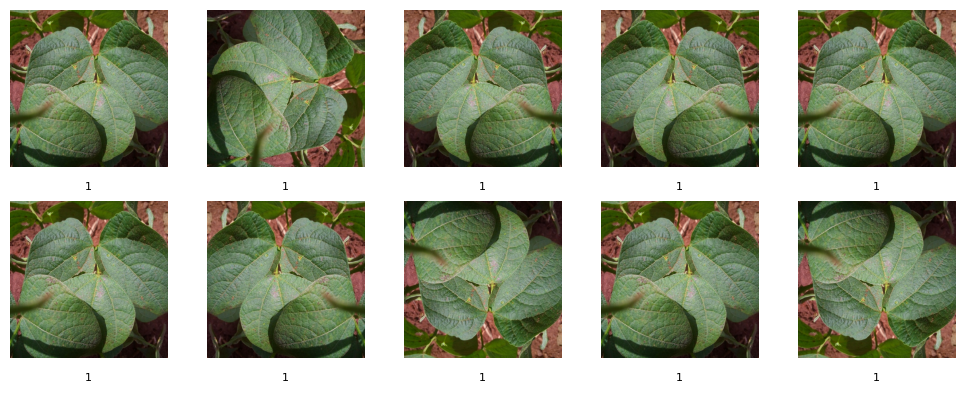

In [18]:
transformed_images, labels = [], []
for _ in range(10):
    image, label = loader[0]
    transformed_images.append(image)
    labels.append(label)

_ = viz.show_images_and_labels(transformed_images, labels)

We can also use TensorFlow transforms, namely through the `keras.layers.experimental.preprocessing` layers wrapped in a `keras.Sequential` model.

In [19]:
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential

loader.transform(transform="reset")
loader.transform(transform=Sequential([RandomFlip(), RandomRotation(0.2)]))

*Notice the message above informing us that the backend has been switched to TensorFlow. This is part of AgML's backend system, which will track the inputs being delivered and ensure that the correct internal conversions are being used for TensorFlow vs. PyTorch methods.*

Inspection of the loader now will yield similarly rotated and flipped images:


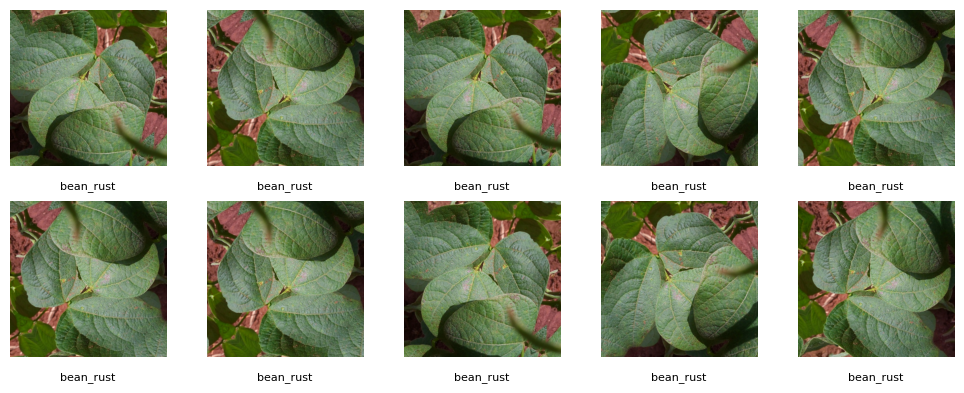

In [20]:
transformed_images, labels = [], []
for _ in range(10):
    image, label = loader[0]
    transformed_images.append(image)
    labels.append(label)

_ = viz.show_images_and_labels(transformed_images, labels, info=loader.info)

In general, to use any other type of method, such as augmentations from the `tf.image` module or custom functions, we can apply a transform function which takes in one input (the image), applies a transformation, and returns the output.

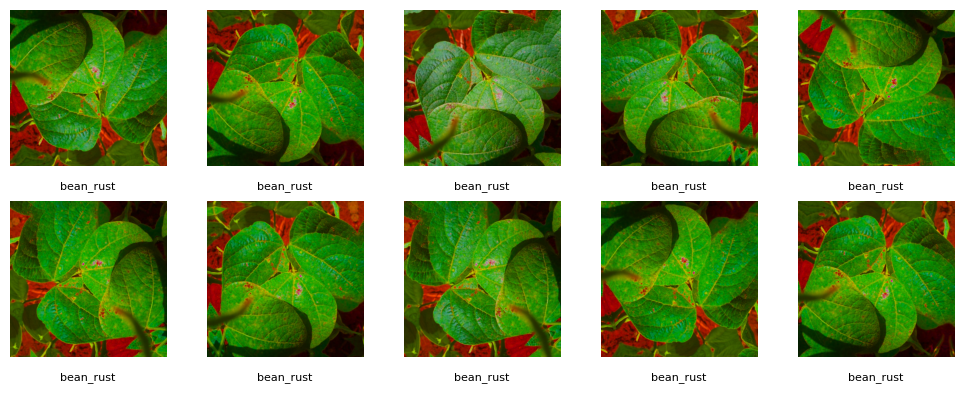

In [21]:
import tensorflow as tf

loader.transform(
    transform=lambda image: tf.image.random_flip_up_down(
        tf.image.random_saturation(image, 1, 10)
    )
)

transformed_images, labels = [], []
for _ in range(10):
    image, label = loader[0]
    transformed_images.append(image)
    labels.append(label)

_ = viz.show_images_and_labels(transformed_images, labels, info=loader.info)

Transforms for semantic segmentation tasks include two additional arguments, namely `target_transform`, which is applied only to the output annotation mask, and `dual_transform`, which gets applied to both the image and its annotation.

We will start with `dual_transform`, and an `albumentations` pipeline. When using either `albumentations` or `keras.layers.experimental.preprocessing` layers, the pipeline passed to `dual_transform` should accept one image and return one transformed image, and will be applied with the same random seed to both the image and annotation target.

In [22]:
# Switch the backend back to torch.
agml.backend.set_backend("torch")

loader = agml.data.AgMLDataLoader("apple_flower_segmentation")
loader.transform(dual_transform=A.Compose([A.RandomRotate90(), A.HorizontalFlip()]))

for _ in range(4):
    _ = viz.show_image_and_overlaid_mask(loader[0])

We can also use a mix of the `transform` and `dual_transform` arguments, namely when applying visual augmentation to the input image and spatial augmentation to both the image and target annotation. This would function as follows:

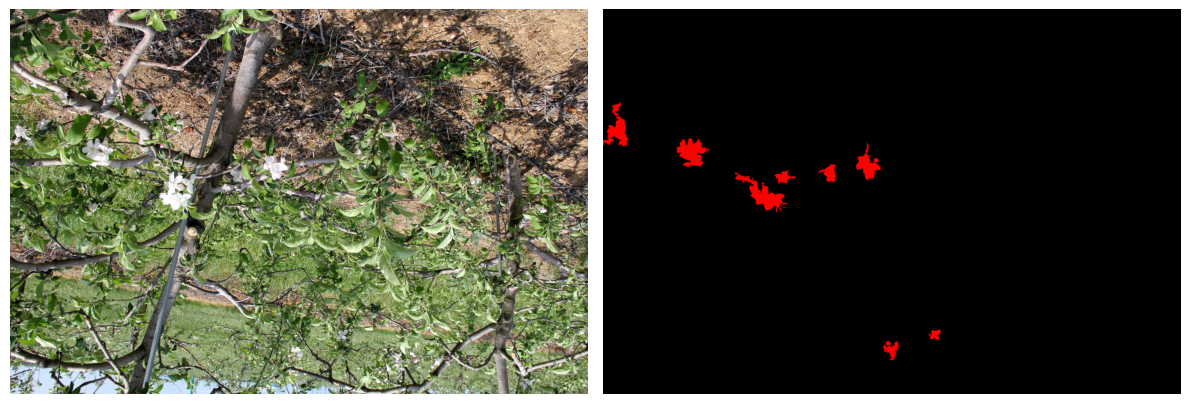

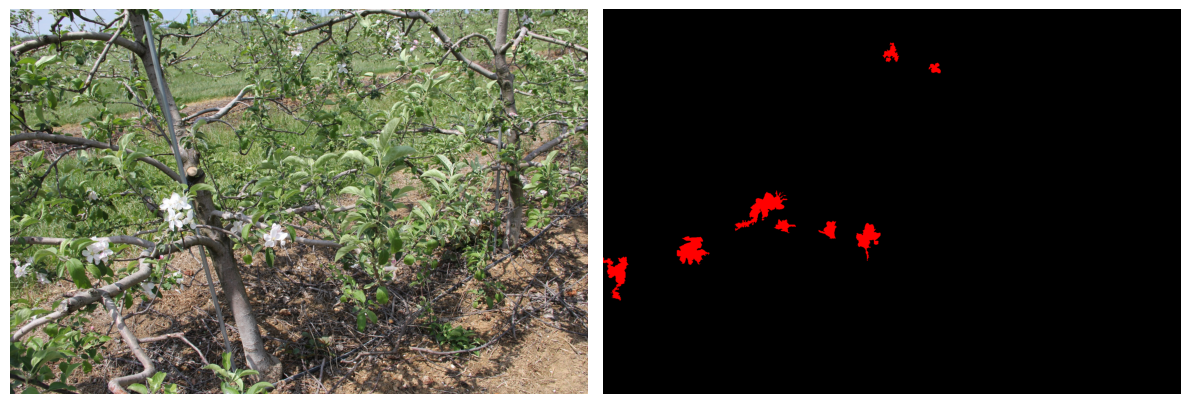

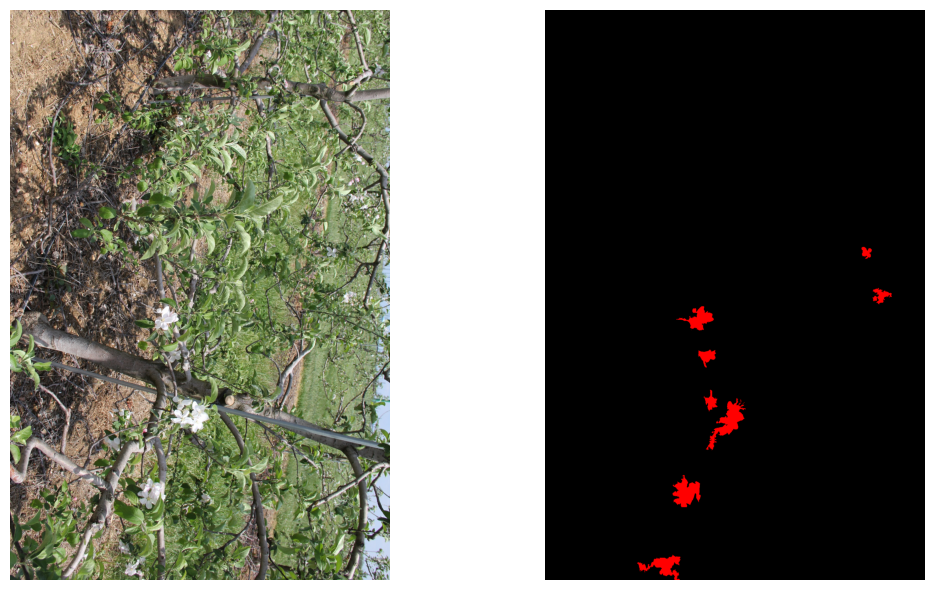

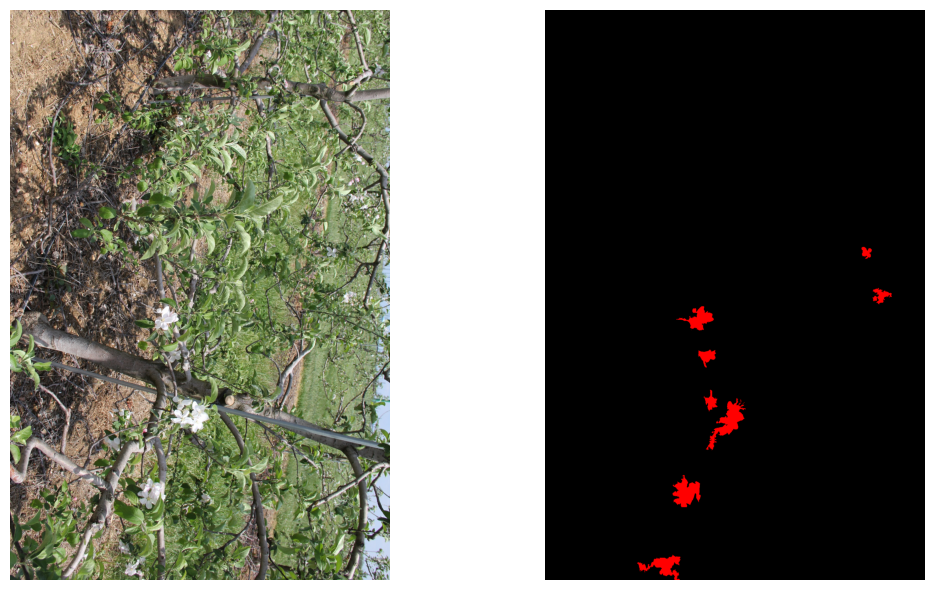

In [23]:
loader.transform(
    transform=A.RandomBrightnessContrast(),
    dual_transform=A.Compose([A.RandomRotate90(), A.HorizontalFlip()]),
)

for _ in range(4):
    _ = viz.show_image_and_mask(loader[0])

Object detection loaders work in a similar fashion, although there is no `target_transform` argument, only `transform` and `dual_transform`. Additionally, since they return a COCO JSON dictionary, the `dual_transform` argument only accepts a method which has two inputs (the image and COCO JSON dictionary) and two outputs (the transformed image and transformed COCO JSON dictionary).

### Using native TensorFlow and PyTorch datasets

The `AgMLDataLoader` contains a set of methods which allow for direct integration into PyTorch and TensorFlow training pipelines, which involves conversion of the data to native PyTorch/TensorFlow datasets.

The first way this can be achieved is to use the `AgMLDataLoader` object directly in the training pipeline, but with a conversion to a `torch.utils.data.Dataset` or `keras.utils.Sequence` in order to function in the pipeline. This can be done as follows.


In [24]:
import torch.utils.data

loader = agml.data.AgMLDataLoader("apple_flower_segmentation")
print(f"Is PyTorch Dataset: {isinstance(loader, torch.utils.data.Dataset)}")
loader.as_torch_dataset()
print(f"Is PyTorch Dataset: {isinstance(loader, torch.utils.data.Dataset)}")

Is PyTorch Dataset: False
Is PyTorch Dataset: True


In [25]:
import tensorflow as tf

agml.backend.set_backend("tf")
loader = agml.data.AgMLDataLoader("apple_flower_segmentation")
print(f"Is Keras Sequence: {isinstance(loader, tf.keras.utils.Sequence)}")
loader.as_keras_sequence()
print(f"Is Keras Sequence: {isinstance(loader, tf.keras.utils.Sequence)}")

Is Keras Sequence: False
Is Keras Sequence: True


## For experienced users

AgML provides a number of hooks for users to use AgML public data as they desire. While the `AgMLDataLoader` provides functionality for integrating with existing pipelines, experienced users who just want to get the data and process it in their own way can use the `loader.export_contents()` method.

For an image classification dataset, this will return two arrays mapping the images and their labels:

In [26]:
classification_loader = agml.data.AgMLDataLoader("bean_disease_uganda")
contents = [[k, v] for k, v in classification_loader.export_contents().items()]
for i in range(10):
    print("Image: {}\n\tLabel: {}".format(contents[i][0], contents[i][1]))

Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.265.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.271.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.259.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.99.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.311.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.66.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.72.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.305.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.339.jpg
	Label: 2
Image: /Users/amogh/.agml/datasets/bean_disease_uganda/healthy/healthy_train.113.jpg
	Label: 2


A semantic segmentation dataset works similarly, instead mapping the image paths with the pixel-wise annotation mask paths.

In [27]:
segmentation_loader = agml.data.AgMLDataLoader("apple_flower_segmentation")
contents = [[k, v] for k, v in segmentation_loader.export_contents().items()]
for i in range(10):
    print("Image: {}\n\tAnnotation: {}".format(contents[i][0], contents[i][1]))

Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/1.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/1.png
Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/14.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/14.png
Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/17.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/17.png
Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/19.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/19.png
Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/22.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/22.png
Image: /Users/amogh/.agml/datasets/apple_flower_segmentation/images/23.jpg
	Annotation: /Users/amogh/.agml/datasets/apple_flower_segmentation/annotations/23.png
Image: /Users/amogh/.agml/datasets/a

The object detection loader has different options available for content exporting. Using `loader.export_contents()` without any options returns the processed object detection annotations, with one dictionary containing all the bounding boxes for a single image. Using `loader.export_contents('coco')` returns the annotations in COCO JSON format.
As an example of the first case:

In [28]:
detection_loader = agml.data.AgMLDataLoader("fruit_detection_worldwide")
contents = detection_loader.export_contents()
for image, annotation in list(contents.items())[:5]:
    print("Image: {}\n\tAnnotation: {}".format(image, annotation))

Image: /Users/amogh/.agml/datasets/fruit_detection_worldwide/images/n11706761_56.png
	Annotation: [{'area': 18228, 'iscrowd': 0, 'bbox': [138, 110, 124, 147], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 1}, {'area': 15066, 'iscrowd': 0, 'bbox': [72, 76, 93, 162], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 2}, {'area': 9360, 'iscrowd': 0, 'bbox': [161, 247, 104, 90], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 3}, {'area': 10458, 'iscrowd': 0, 'bbox': [284, 101, 83, 126], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 4}, {'area': 10710, 'iscrowd': 0, 'bbox': [359, 139, 90, 119], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 5}, {'area': 5805, 'iscrowd': 0, 'bbox': [452, 37, 45, 129], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 1, 'id': 6}]
Image: /Users/amogh/.agml/datasets/fruit_detection_worldwide/images/n11706761_7812.png
	Annotat

## Additional features and tools

The `agml.data` module contains a few additional features for convenience and formatting. The first main feature, `agml.data.download_public_dataset`, is for users who just want to download a dataset to a local path without actually using the `AgMLDataLoader`:

In [29]:
import os

if "google.colab" in sys.modules:
    agml.data.download_public_dataset(
        "rice_seedling_segmentation", "/content/rice_seedling_segmentation"
    )
    print(
        "Directory Contents: " + str(os.listdir("/content/rice_seedling_segmentation"))
    )
else:
    agml.data.download_public_dataset("rice_seedling_segmentation", ".")
    print("Directory Contents: " + str(os.listdir("./rice_seedling_segmentation")))

10-07-2024 20:16:56 WARNING - root: [AgML] Dataset 'rice_seedling_segmentation' already exists in './rice_seedling_segmentation', skipping download.


Directory Contents: ['images', 'annotations']


Additionally, the module includes convenience functions for working with COCO JSON annotations:

1. `coco_to_bboxes`: Extracts the bounding boxes and category labels from a COCO JSON dictionary or list of COCO JSON annotation dictionaries.
2. `convert_bbox_format`: Converts bounding box formats to the COCO JSON format (x1, y1, width, height).

For the first example:

In [30]:
loader = agml.data.AgMLDataLoader("apple_detection_spain")
print(agml.data.coco_to_bboxes(loader[0][1]))

(array([[124, 182,  49,  48],
       [108, 269,  45,  45],
       [176, 171,  52,  52],
       [427, 256,  44,  44],
       [492, 192,  42,  42],
       [163, 273,  40,  40],
       [100, 201,  40,  39],
       [514, 319,  30,  31]]), array([1, 1, 1, 1, 1, 1, 1, 1]))


And for an example of `convert_bbox_format`:

In [31]:
# Suppose we have a bounding box in the format (x_min, y_min, x_max, y_max):
bbox = [100, 200, 500, 700]

# We can convert this to the correct format using the `fmt` argument.
print(agml.data.convert_bbox_format(bbox, ["x_min", "y_min", "x_max", "y_max"]))

[100 200 400 500]


## Next Steps

From here, you are ready to use the `agml.data` API to access public agricultural datasets and use them in deep learning training and evaluation pipelines. Check out the AgML documentation for more information about the module.